# Echauffement

## Question 1.1
- Python manipule les entiers de grande taille naturellement, pas besoin d'utiliser une librairie spécifique

## Question 1.2
- Python nous fourni une fonction $format$ qui permet d'obtenire une représentation binaire d'un entier sous forme d'une chaine de caractères. Notre fonction fait appel à cette fonction et pour avoir les bits de poids les faibles on a besoin en plus d'inverser la chaine de caractères renvoyé par $format$ en utilisant $reversed$, qui est aussi une built-in fonction en Python.

In [4]:
def decomposition(n):
    return [bit == "1" for bit in reversed(format(n, "b"))]

- Tester $decomposition(38)$:

In [5]:
# Test
decomposition(38)

[False, True, True, False, False, True]

## Question 1.3
- Utiliser liste slicing et liste concatenation en Python:
    + Si $n$ est plus petite que la longeur de la liste, on va la tronquer jusqu'à n-ième élément.
    + Si non, on va l'enchaîner avec une liste avec $n - len(liste)$ élément False.

In [6]:
def completion(list_bits, n):
    length = len(list_bits)
    if n > length:
        return list_bits + [False] * (n - length)
    else:
        return list_bits[:n]

- Tester $completion$:

In [9]:
# Test
completion([False, True, True, False, False, True], 4)

[False, True, True, False]

In [10]:
# Test
completion([False, True, True, False, False, True], 8)

[False, True, True, False, False, True, False, False]

## Question 1.4
- Juste simplemen faire appel aux deux fonctions $completion$ et $decomposition$ déjà définies.

In [7]:
def table(x, n):
    return completion(decomposition(x), n)

In [12]:
# Test
table(38, 8)

[False, True, True, False, False, True, False, False]

# Arbre de décision et compression

## Question 2.5
- Pour encoder des arbres binaire de décision, on va utiliser une classe $Node$ avec les attributes suivant:
    + $label$: étiquette du noeud.
    + $left$: sous-arbre à gauche.
    + $right$: sous-arbre à droit.
    + $luka$: mot de Lukasiewicz enrichi associé au noeud.  
    
  et les méthodes correpondantes à chaque attribute afin de retourner la valeur de cette attribute ou lui assigner une valeur (get, set).

In [8]:
class Node:
    def __init__(self, label, left, right):
        self.label = label 
        self.left = left 
        self.right = right
        self.luka = "" 
    def get_left(self):
        return self.left
    def get_right(self):
        return self.right
    def set_left(self, left):
        self.left = left
    def set_right(self, right):
        self.right = right  
    def get_label(self):
        return self.label
    def set_label(self, label):
        self.label = label
    def set_luka(self, luka_word):
        self.luka = luka_word
    def get_luka(self):
        return self.luka
    def __str__(self):
        return str(self.label) +  " Left: (" + self.left.__str__() + ") Right: (" + self.right.__str__() + ")"

## Question 2.6
- On fixe un ordre de variable et on fait un parcours préfixe pour construire notre arbre:
    + L'hateur d'arbre $h = n + 1$ avec n le nombre de variable.
    + Le nombre de variable $n = log_{2}(l)$ avec l la longeur de la table de vérité en entrée.
    + Tous les noeuds à la même hauteur ont la même étiquette.
    + Si on arrive au niveau où $h = n$, on retire deux valeur en tête de la table de vérité et on construit un noeud avec les sous-noeuds gauche et droit étiquetés par ces deux valeurs.

In [9]:
import math

def traverse_tree(tree, list_vars, truth_table, count):
    if count != len(list_vars) - 1:
        if tree is None:
            tree = Node(list_vars[count], None, None)
            
        left = traverse_tree(None, list_vars, truth_table, count+1)
        right = traverse_tree(None, list_vars, truth_table, count+1)
        tree.set_left(left)
        tree.set_right(right)
        return tree
    else:
        value1 = truth_table.pop(0)
        value2 = truth_table.pop(0)
        return Node(list_vars[count], Node(value1, None, None), Node(value2, None, None))

def cons_arbre(truth_table):
    nb_vars = math.log2(len(truth_table))
    if nb_vars - int(nb_vars) != 0:
        return None

    list_vars = [x for x in range(1, int(nb_vars)+1)]
    # random.shuffle(list_vars)
    return traverse_tree(None, list_vars, truth_table, 0)
            

- Tester de $cons\_arbre$ avec une table de vérité de taille 8 issue de l'entier 38

In [10]:
# Test
# Decision tree issu de la table de vérité de taille 8 construite sur l'entier 38
tree1 = cons_arbre(table(38, 8))
print(tree1)

1 Left: (2 Left: (3 Left: (False Left: (None) Right: (None)) Right: (True Left: (None) Right: (None))) Right: (3 Left: (True Left: (None) Right: (None)) Right: (False Left: (None) Right: (None)))) Right: (2 Left: (3 Left: (False Left: (None) Right: (None)) Right: (True Left: (None) Right: (None))) Right: (3 Left: (False Left: (None) Right: (None)) Right: (False Left: (None) Right: (None))))


## Question 2.7
- On parcourt notre arbre en ordre postfixe:
    + Si c'est une feuille (True or False), le mot de Lukasiewicz $l$ égale à l'étiquette de cette feuille.
    + Si non, $l$ = etiquette + $(l_{gauche})$ + $(l_{droit})$  

In [11]:
def luka(tree):
    if tree.get_left() is None and tree.get_right() is None:
        new_luka_word = str(tree.get_label())
        tree.set_luka(new_luka_word)
    else:
        luka(tree.get_left())
        luka(tree.get_right())
        left = tree.get_left()
        right = tree.get_right()
        tree.set_luka(str(tree.get_label()) + "(" + left.get_luka() + ")" + "(" + right.get_luka() + ")")

## Question 2.8
- On fait un parcours préfixe avec une dictionnaire $seen$ pour stocker les adresses les structures des sous-arbres déjà visitées. A chaque noeud visité, on doit vérifier que le mot Lukasiewicz associé à ce noeud se trouve dans notre dictionnaire ou pas:
    + Si oui, retourner le pointeur vers ce noeud.
    + Si non, ajouter le mot Lukasiewicz associé à ce noeud dans notre dictionnaire. Continuer à visiter ses sous-arbres gauche et droit.
- Le choix d'utiliser une dictionnaire-une built-in structure de données en Python vient du fait que le temps de chercher une clé dans une dictionnaire is $O(1)$ (les clés sont hachées).
- On décide de calculer aussi le nombre de noeuds aussi en parcourant les arbres.

In [12]:
def compression(luka_tree, seen):
    if luka_tree.get_left() is None and luka_tree.get_right() is None:
        luka_word = luka_tree.get_luka()
        if luka_word in seen:
            return seen[luka_word], 0
        else:
            seen[luka_word] = luka_tree
            return luka_tree, 1

    luka_word = luka_tree.get_luka()
    if luka_word in seen:
        return seen[luka_word], 0
    else:
        seen[luka_word] = luka_tree
        compact_tree = luka_tree
        left, left_child_node_count = compression(luka_tree.get_left(), seen)
        compact_tree.set_left(left)
        right, right_child_node_count = compression(luka_tree.get_right(), seen)
        compact_tree.set_right(right)

        return compact_tree, left_child_node_count + right_child_node_count + 1

## Question 2.9
- On utilise le module graphviz en Python.
- Pour distinguer les noeuds avec les mêmes étiquettes, on leur associe les identificateurs par leurs adresse.

In [18]:
import graphviz as gv
import copy
from IPython.display import Image

def have_edge(g, v1, v2, is_dashed):
    if is_dashed:
        return "\t" + str(v1) + " -- " + str(v2) + " [style=dashed]" in g.body
    else:
        return "\t" + str(v1) + " -- " + str(v2) in g.body

def have_node(g, id, label):
    return "\t" + id + " [label=" + label + "]" in g.body

def build(graph, tree, previous_node_id=None, decision_tree=True, is_dashed=True):
    if tree is None:
        return
    new_node_label = "x" + str(tree.get_label()) if type(tree.get_label()) == int else str(tree.get_label())
    new_node_id = str(id(tree))
    if not have_node(graph, new_node_id, new_node_label):
        graph.node(new_node_id, new_node_label)
    if previous_node_id is not None:
        if decision_tree and is_dashed:
            if not have_edge(graph, previous_node_id, new_node_id, True):
                graph.edge(previous_node_id, new_node_id, style="dashed")
        else:
            if not have_edge(graph, previous_node_id, new_node_id, False):
                graph.edge(previous_node_id, new_node_id)

    build(graph, tree.get_left(), new_node_id)
    build(graph, tree.get_right(), new_node_id, is_dashed=False)

def dot(tree, name="graph", directory="graph_image", decision_tree=True):
    g = gv.Graph(name)
    g.format = "png"
    temp_tree = copy.copy(tree)

    build(g, temp_tree, decision_tree=decision_tree)
    # print(g.body)
    g.render(directory=directory)

- Tester les fonctionnement des $dot$, $compression$, $luka$.
- Image de l'arbre de décision issu de table de vérité de taille 8 construite sur l'entier 38

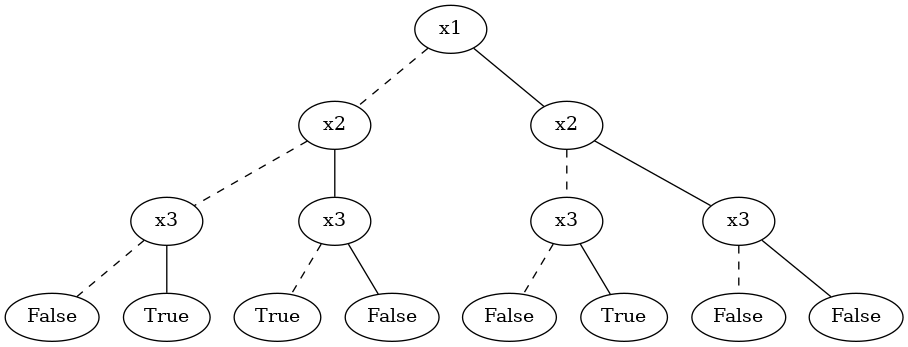

In [19]:
# Test
dot(tree1, "decision_tree_1")
Image("graph_image/decision_tree_1.gv.png")

- Le mot de Lukasiewicz associé à l'arbre ci-dessus

In [20]:
luka(tree1)
print(tree1.get_luka())

1(2(3(False)(True))(3(True)(False)))(2(3(False)(True))(3(False)(False)))


- Image de l'arbre de décision issu de la table de vérité de taille 16 construite sur l'entier 57

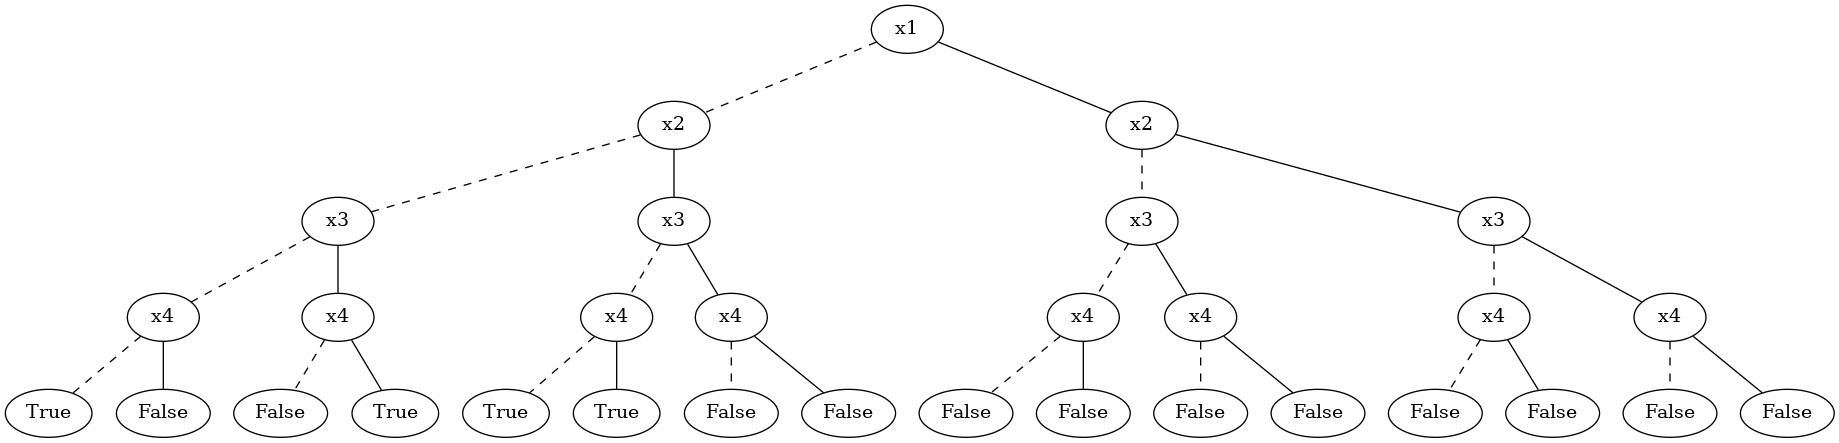

In [21]:
# Test
tree2 = cons_arbre(table(57, 16))
dot(tree2, "decision_tree_2")
Image("graph_image/decision_tree_2.gv.png")

- Le mot de Lukasiewicz associé à l'arbre ci-dessus

In [22]:
luka(tree2)
print(tree2.get_luka())

1(2(3(4(True)(False))(4(False)(True)))(3(4(True)(True))(4(False)(False))))(2(3(4(False)(False))(4(False)(False)))(3(4(False)(False))(4(False)(False))))


- DAG obtenu par compression du premier l'arbre de décision ci-dessus

Number of nodes: 8


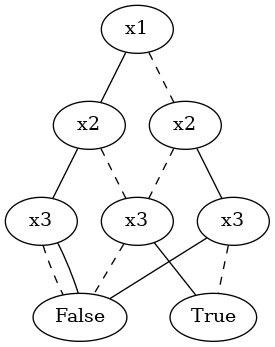

In [23]:
import copy
compressed_tree_1, n = compression(copy.deepcopy(tree1), dict())
print(f"Number of nodes: {n}")
dot(compressed_tree_1, "compressed_tree_1")
Image("graph_image/compressed_tree_1.gv.png")

- DAG obtenu par compression du deuxième l'arbre de décision ci-dessus

Number of nodes: 12


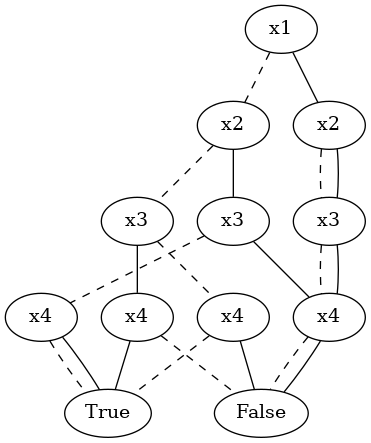

In [24]:
compressed_tree_2, n = compression(copy.deepcopy(tree2), dict())
print(f"Number of nodes: {n}")
dot(compressed_tree_2, "compressed_tree_2")
Image("graph_image/compressed_tree_2.gv.png")

# Arbre de décision et ROBDD

## Question 3.10
- La stratégie de $compression$ implante déjà les deux règles de terminal et de merging. Ce qui nous reste c'est la règle de deletion.
- Pour cela, à chaque noeud visité, on vérifie si le noeud fils à gauche et le noeud fils à droit ont le même mot de Lukasiewicz ou pas. 
    + Si oui: on cherche ce mot de Lukasiewicz dans notre dictionnaire. Si on le trouve, retourner le pointeur associé à ce mot. Si non, on continue la compression à partir du noeuds fils à gauche. Enfin, on ajoute dans notre dictionnaire le mot de Lukasiewicz du noeud père avec le pointeur vers le noeuds fils qu'on vient de trouver.
    + Si non, continuer la compression à partir du noeud père.
- On compte aussi le nombre de noeuds en traversant les arbres. C'est pour but de ne pas devoir traverser chaque arbre deux fois dans la partie 4, quand on veut calculer la distribution de taille des ROBDDs.

In [25]:
def compression_bdd(luka_tree, seen):
    if luka_tree.get_left() is None and luka_tree.get_right() is None:
        luka_word = luka_tree.get_luka()
        if luka_word in seen:
            return seen[luka_word], 0
        else:
            seen[luka_word] = luka_tree

            return luka_tree, 1
    
    # Deletion rule
    left, right = luka_tree.get_left(), luka_tree.get_right()
    if left is not None and right is not None:
        left_luka_word, right_luka_word = left.get_luka(), right.get_luka()
        if left_luka_word == right_luka_word:
            if left_luka_word in seen:
                seen[luka_tree.get_luka()] = seen[left_luka_word]
                return seen[left_luka_word], 0
            else:
                new_left, child_node_count = compression_bdd(left, seen)
                seen[luka_tree.get_luka()] = new_left
                return new_left, child_node_count                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

    # Termination rule and merging rule
    luka_word = luka_tree.get_luka()
    if luka_word in seen:
        return seen[luka_word], 0
    else:
        seen[luka_word] = luka_tree
        compact_tree = luka_tree
        new_left, left_child_node_count = compression_bdd(luka_tree.get_left(), seen)
        compact_tree.set_left(new_left)
        new_right, right_child_node_count = compression_bdd(luka_tree.get_right(), seen)
        compact_tree.set_right(new_right)

        return compact_tree, left_child_node_count + right_child_node_count + 1

- Tester le fonctionnement de $compression\_bdd$

- ROBDD associé au premier arbre de décision ci-dessus

Number of nodes: 7


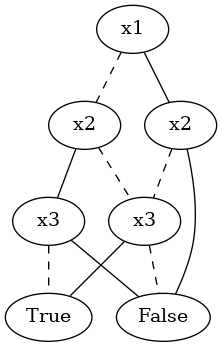

In [26]:
compressed_bdd_tree_1, n = compression_bdd(copy.deepcopy(tree1), dict())
print(f"Number of nodes: {n}")
dot(compressed_bdd_tree_1, "compressed_bdd_tree_1")
Image("graph_image/compressed_bdd_tree_1.gv.png")

- ROBDD associé au deuxième arbre de décision ci-dessus

Number of nodes: 8


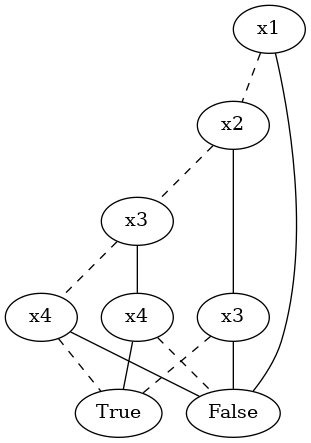

In [27]:
compressed_bdd_tree_2, n = compression_bdd(copy.deepcopy(tree2), dict())
print(f"Number of nodes: {n}")
dot(compressed_bdd_tree_2, "compressed_bdd_tree_2")
Image("graph_image/compressed_bdd_tree_2.gv.png")

- ROBDD et DAG associé au l'arbre de décision issu de la table de vérité de taille 64 construite sur l'entier 8173891789

Number of DAG node: 27
Number of ROBDD nodes: 21


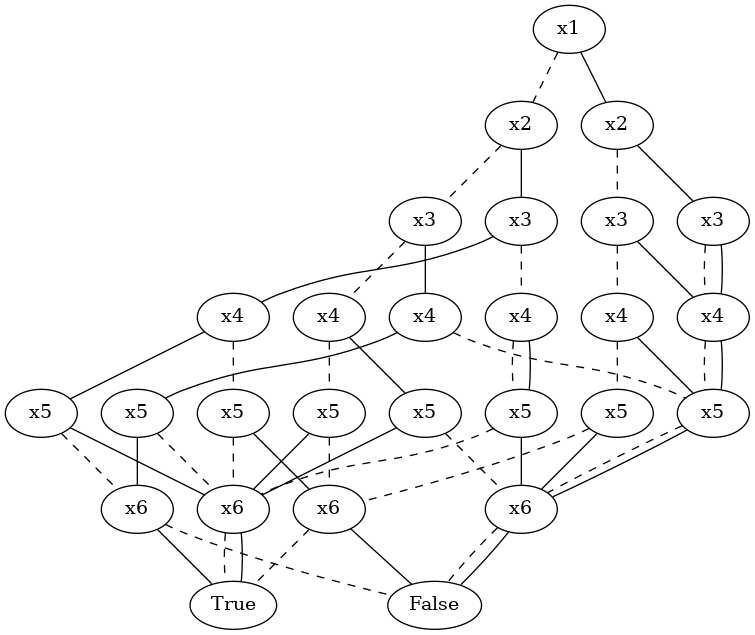

In [28]:
tree3 = cons_arbre(table(8173891789, 64))
luka(tree3)
compressed_tree_3, n = compression(copy.deepcopy(tree3), dict())
print(f"Number of DAG node: {n}")
compressed_bdd_tree3, n = compression_bdd(copy.deepcopy(tree3), dict())
print(f"Number of ROBDD nodes: {n}")
dot(compressed_tree_3, "compressed_tree_3")
dot(compressed_bdd_tree3, "compressed_bdd_tree_3")
Image("graph_image/compressed_tree_3.gv.png")


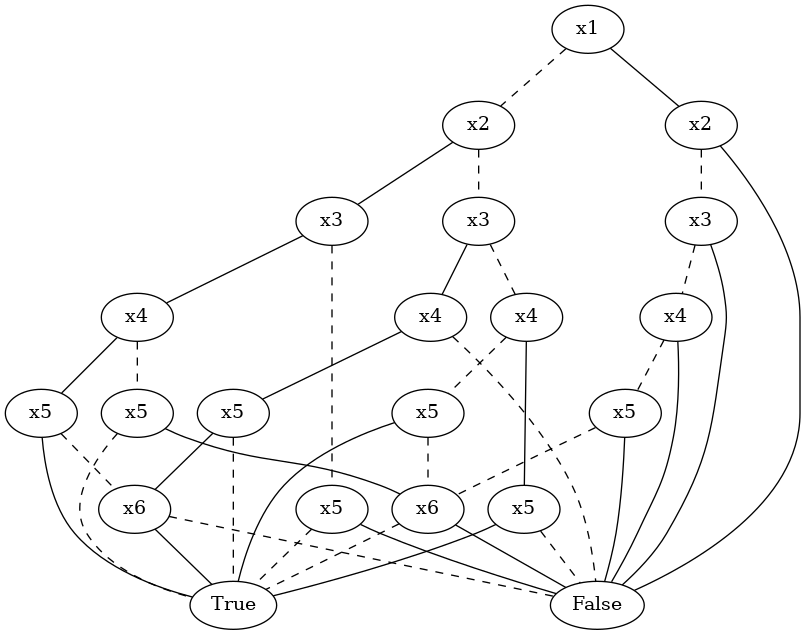

In [29]:
Image("graph_image/compressed_bdd_tree_3.gv.png")

## Question 3.11
- Considérons l'arbre de décision de hauteur $h$ et toutes les feuilles etitiquetées par $False$. C'est l'arbre de hauteur $h$ avec le mot de Lukasiewicz de la racine le plus long.
- Cet arbre a en totale $2^{h+1} - 1$ noeuds avec $2^h - 1$ noeud internes et $2^h$ feuilles.
- Chaque feuille étiquetée par $False$ va ajouter au mot Lukasiewicz de la racine une chaine $(False)$ ayant $7$ caractères. Donc $2^h$ feuilles va contribuer $7\times 2^h$ caractères au mot Lukasiewicz de la racine.
- Chaque noeud interne est étiqueté par $2$ caractères: $xi$ avec $1 \leq i \leq h$ en étant donné que hauteur de l'arbre $1 \leq h \leq 9$. Donc chaque noeud interne sauf la racine va ajouter au mot de Lukasiewicz de la racine une chaine $(xi)$ ayant 4 caractères. Au total $2^{h} - 2$ noeuds internes sauf la racine va contribuer au
mot Lukasiewicz de la racine $4 \times (2^h - 2)$ caractères.
- La racine ajout au son mot de Lukasiewicz son étiquette ayant 2 caractères.
- Donc la longeur du mot de Lukasiewicz de la racine de notre arbre sera:
\begin{equation}
l_h = 4 \times (2^h - 2) + 7 \times 2^h + 2 = 11 \times 2^h - 6
\end{equation}
- Comme c'est l'arbre de hauteur $h$ ayant le mot Lukuasiewicz de la racine le plus long, on peut prouver que la longeur du mot de Lukasiewicz d'un arbre de hauteur $h$ est majorée par $l_h$

## Question 3.12
- L'idée de l'algorithm est que l'on parcourt l'arbre et on stocke en mémoire les mot de Lukasiewiczet et les pointeurs vers les structures des sous-arbres déjà visitées:
    + Quand on arrive à un noeud, on doit comparer son mot aux autres mot des noeuds dans le même niveau.
    + La complexité pour effectuer toutes ces comparaisons peuvent être majorée par la longueur du mot Lukasiewicz de la racine si on les fait de manière efficace. On peut utiliser une table de hachage par exemple. Donc la complexité pour traverser un niveau est $11 \times 2^h$.
    + Comme c'est un arbre de hauteur $h$, on traverse $h$ niveau et la complexité totale est:
    \begin{equation}
    11 \times h \times 2^h
    \end{equation} 

## Question 3.13
- Pour un arbre de décision qui est un arbre binaire complet, la relation entre son nombre de noeuds $n$ et sa hauteur $h$ est:
\begin{equation}
n = 2^{h+1} - 1
\end{equation}
- Donc la complexité de l'algorithme en fonction de $n$ est:
\begin{equation}
11 \times [log(n+1) - 1] \times (\frac{n+1}{2}) \\
= O(nlog(n))
\end{equation}

# Etude expérimentale

## Question 4.15

- Pour les ROBDDs représentant les boolean fonctions de 1 à 4 variables, on va calculer la distribution exacte de la taille en itérant tous les $2^{2^n}$ arbres possibles. 
- Chaque arbre va être généré grâce à une table de vérité issue de l'entier $0 \leq i < 2^{2^n}$ et de la taille $2^n$.
- Après, on applique la fonction $luka$ sur les arbres afin de leurs associer les mots Lukasiewicz. Puis on les compresser et calculer les nombres des noeuds correspondantes. Enfin on récupère les données et dessiner des graphes 

In [30]:
# Function for calculate and plot the ROBDD size distribution for boolean function of size from 1 to 4 variables
from collections import defaultdict
import matplotlib.pyplot as plt

def calculate_exact_distribution(n):
    nb_functions = defaultdict(lambda : 0)
    for i in range(2 ** (2 ** n)):
        tree = cons_arbre(table(i, 2 ** n))
        luka(tree)
        _, nb_nodes = compression_bdd(tree, dict())
        nb_functions[nb_nodes] += 1

    datas = sorted(list(zip(nb_functions.keys(), nb_functions.values())), key=lambda x: x[0])
    x = [data[0] for data in datas]
    y = [data[1] for data in datas]
    plt.plot(x, y, "bo-")
    plt.xlabel(f"ROBDD node count for {n} variables")
    plt.ylabel(f"Number of Boolean functions")
    plt.grid()

- Distribution de taille exacte pour ROBDD avec 1 variables

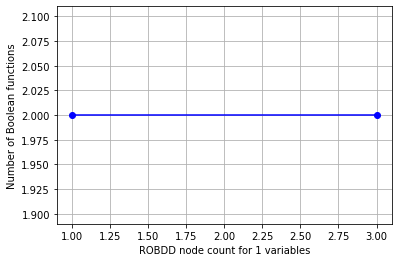

In [31]:
calculate_exact_distribution(1)

- Distribution de taille exacte pour ROBDD avec 2 variables

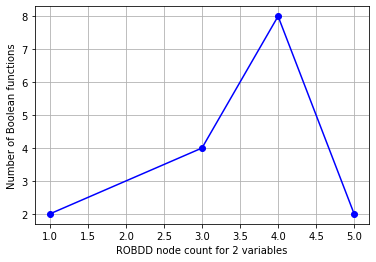

In [32]:
calculate_exact_distribution(2)

- Distribution de taille exacte pour ROBDD avec 3 variables

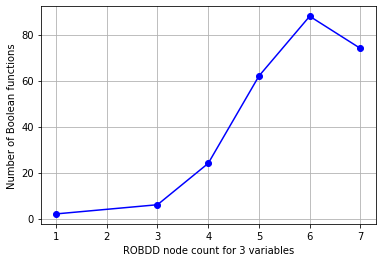

In [33]:
calculate_exact_distribution(3)

- Distribution de taille exacte pour ROBDD avec 4 variables

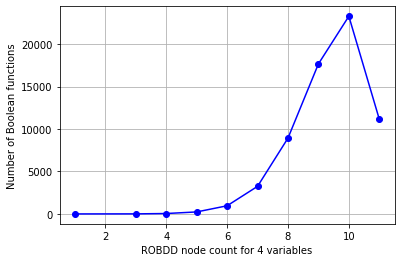

In [34]:
calculate_exact_distribution(4)

## Question 4.16

- Pour les ROBDDs représentant les boolean fonctions de 5 à 10 variables, le nombres de fonctions est très grand donc c'est pas possible d'itérer tous les arbres.
- Donc pour calculer la distribution de la taille, on va générer un échantillon de taille suffisamment grande avec les entier entre $0$ et $2^{n-1}$. Et pour dessiner les graphes on va faire comme pour le calcul de la distribution exacte.

In [35]:
# Function for calculate and plot the approximate ROBDD size distribution for boolean function of size from 5 to 10 variables

import time
from random import randrange
from datetime import timedelta

def calculate_appro_distribution(n, nb_samples=500000):
    generated = set()
    nb_functions = defaultdict(lambda : 0)
    while len(generated) < nb_samples:
        i = randrange(2 ** (2 ** n))
        if i not in generated:
            generated.add(i)
        tree = cons_arbre(table(i, 2 ** n))
        luka(tree)
        _, nb_nodes = compression_bdd(tree, dict())
        nb_functions[nb_nodes] += 1
    
    datas = sorted(list(zip(nb_functions.keys(), nb_functions.values())), key=lambda x: x[0])
    x = [data[0] for data in datas]
    y = [data[1] for data in datas]
    plt.plot(x, y, "bo-")
    plt.xlabel(f"ROBDD node count for {n} variables")
    plt.ylabel(f"Number of Boolean functions")
    plt.grid()
    return len(x)


- Distribution de taille approximative pour ROBDD avec 5 variables

Number of variables: 5
Number of samples: 1000000
Number of unique sizes: 13
Total compute time: 0:02:23.475530
Second per ROBDD: 0.00014347552967071533


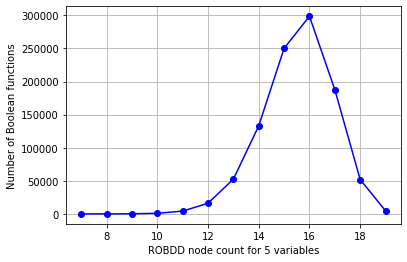

In [36]:
t = time.time()
nb_size_unique = calculate_appro_distribution(5, 1000000)
t = time.time() - t
print("Number of variables: 5")
print(f"Number of samples: 1000000")
print(f"Number of unique sizes: {nb_size_unique}")
print(f"Total compute time: {str(timedelta(seconds=t))}")
print(f"Second per ROBDD: {t / 1000000}")

- Distribution de taille approximative pour ROBDD avec 6 variables

Number of variables: 6
Number of samples: 1000000
Number of unique sizes: 16
Total compute time: 0:04:36.390399
Second per ROBDD: 0.0002763903985023498


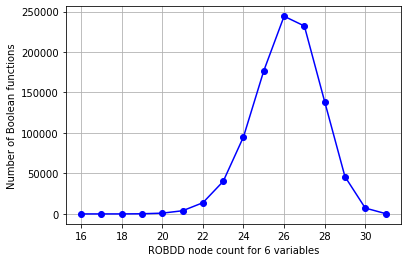

In [37]:
t = time.time()
nb_size_unique = calculate_appro_distribution(6, 1000000)
t = time.time() - t
print("Number of variables: 6")
print(f"Number of samples: 1000000")
print(f"Number of unique sizes: {nb_size_unique}")
print(f"Total compute time: {str(timedelta(seconds=t))}")
print(f"Second per ROBDD: {t / 1000000}")

- Distribution de taille approximative pour ROBDD avec 7 variables

Number of variables: 7
Number of samples: 1000000
Number of unique sizes: 15
Total compute time: 0:07:14.118743
Second per ROBDD: 0.00043411874318122863


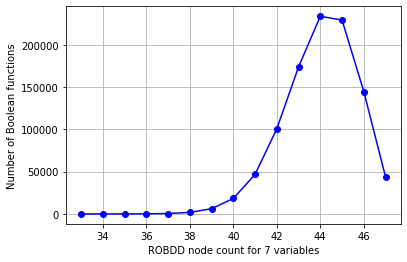

In [38]:
t = time.time()
nb_size_unique = calculate_appro_distribution(7, 1000000)
t = time.time() - t
print("Number of variables: 7")
print(f"Number of samples: 1000000")
print(f"Number of unique sizes: {nb_size_unique}")
print(f"Total compute time: {str(timedelta(seconds=t))}")
print(f"Second per ROBDD: {t / 1000000}")

- Distribution de taille approximative pour ROBDD avec 8 variables

Number of variables: 8
Number of samples: 1000000
Number of unique sizes: 16
Total compute time: 0:20:05.278831
Second per ROBDD: 0.0012052788314819336


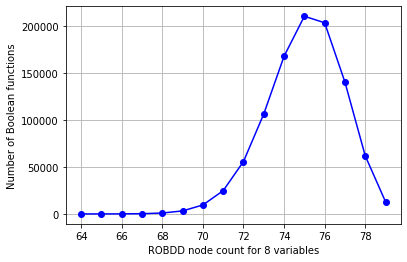

In [39]:
t = time.time()
nb_size_unique = calculate_appro_distribution(8, 1000000)
t = time.time() - t
print("Number of variables: 8")
print(f"Number of samples: 1000000")
print(f"Number of unique sizes: {nb_size_unique}")
print(f"Total compute time: {str(timedelta(seconds=t))}")
print(f"Second per ROBDD: {t / 1000000}")

- Distribution de taille approximative pour ROBDD avec 9 variables

Number of variables: 9
Number of samples: 1000000
Number of unique sizes: 26
Total compute time: 0:45:56.705317
Second per ROBDD: 0.0027567053170204163


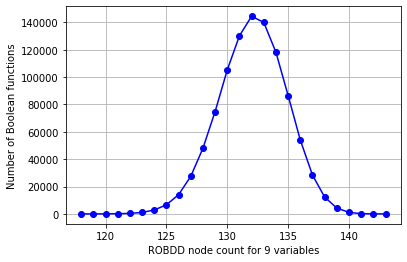

In [40]:
t = time.time()
nb_size_unique = calculate_appro_distribution(9, 1000000)
t = time.time() - t
print("Number of variables: 9")
print(f"Number of samples: 1000000")
print(f"Number of unique sizes: {nb_size_unique}")
print(f"Total compute time: {str(timedelta(seconds=t))}")
print(f"Second per ROBDD: {t / 1000000}")

- Distribution de taille approximative pour ROBDD avec 10 variables

Number of variables: 10
Number of samples: 1000000
Number of unique sizes: 40
Total compute time: 2:07:06.895741
Second per ROBDD: 0.007626895741224289


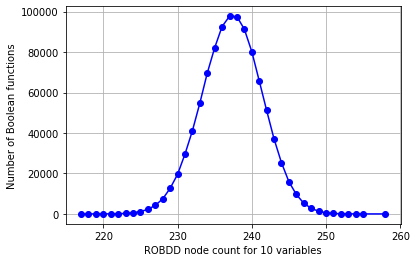

In [41]:
t = time.time()
nb_size_unique = calculate_appro_distribution(10, 1000000)
t = time.time() - t
print("Number of variables: 10")
print(f"Number of samples: 1000000")
print(f"Number of unique sizes: {nb_size_unique}")
print(f"Total compute time: {str(timedelta(seconds=t))}")
print(f"Second per ROBDD: {t / 1000000}")

- On peut appercevoir que quand le nombre de variables augmente, la forme de la distribution de la taille tend vers une distribution normale.

## Question 4.17
- Les informations relative à notre expérimentations sont listées dans le tableau ci-dessous:

| No.Variables (n) | No. Samples | No. Unique Sizes | Compute Time hh:mm:ss | Seconds per ROBDD |
| ---------------- | ----------- | ---------------- | --------------------- | ----------------- |
| 5                | 1.000.000   | 13               | 00:02:23              | 0.00014           |
| 6                | 1.000.000   | 16               | 00:04:36              | 0.00027           |
| 7                | 1.000.000   | 15               | 00:07:14              | 0.00043           |
| 8                | 1.000.000   | 16               | 00:20:05              | 0.0012            |
| 9                | 1.000.000   | 26               | 00:45:56              | 0.0027            |
| 10               | 1.000.000   | 40               | 02:07:06              | 0.0076            |